<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_hydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hydrogen (H and H₂)**

#### **Hydrogen atom H**

In [14]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [15]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    H 0.00 0.00 0.00
'''

# Name
molecule = 'Hydrogen (H)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 1          # A single H atom has one electron, which is unpaired. This is a "doublet" state.
# H₂ gas is stable, closed-shell diatomic molecule. The two electrons (one from each H atom) form a covalent bond with paired spins.
# wo electrons, paired in a bonding orbital. Ground state is a singlet. mol.spin = 0 (since S=0, 2S=0)
mol.build()

In [ ]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Hydrogen (H) molecule symmetry:
 Top group: SO3
 Group name: SO3
--------------------


In [ ]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -0.499278403419583


np.float64(-0.49927840341958307)

converged SCF energy = -0.499278403419583


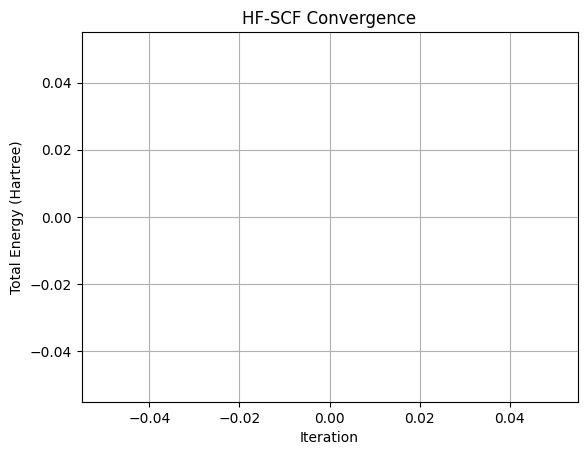

Ground state energy for Hydrogen (H): -0.49927840341958307 Hartree


In [ ]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [ ]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -0.501257936931369


np.float64(-0.5012579369313687)

In [ ]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -0.499278403419583

WARN: RMP2 method does not support ROHF method. ROHF object is converted to UHF object and UMP2 method is called.

E(UMP2) = -0.499278403419583  E_corr = 0
E(SCS-UMP2) = -0.499278403419583  E_corr = 0
MP2 energy: 0.0 Hartree


In [ ]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -0.499278403419583

WARN: RCCSD method does not support ROHF method. ROHF object is converted to UHF object and UCCSD method is called.

E(UCCSD) = -0.4992784034195831  E_corr = -1.921004917081613e-32
UCCSD(T) correction = 0


In [ ]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -0.499278403419583
Excited State energies (eV)
[ 7.91031375 23.86683682 23.86683682]

** Excitation energies and oscillator strengths **
Excited State   1:  ???      7.91031 eV    156.74 nm  f=0.0000
Excited State   2:  ???     23.86684 eV     51.95 nm  f=0.2590
Excited State   3:  ???     23.86684 eV     51.95 nm  f=0.2590


The output is showing that some transitions to excited states are "bright" (can be triggered by light) and others are "dark" (are forbidden to be triggered by light).

The Physics: Atomic Orbitals and Selection Rules
The ground state of a Hydrogen atom has its single electron in the 1s orbital. The first few excited orbitals available are the 2s and 2p orbitals.
For an electron to jump to an excited state by absorbing a photon of light, it must obey spectroscopic selection rules. The most important rule for atoms is that the orbital angular momentum quantum number, l, must change by exactly 1.
 * Δl = ±1 (This transition is ALLOWED)
 * Δl ≠ ±1 (This transition is FORBIDDEN)
The oscillator strength (f) in your output is the calculated probability of that transition happening. A value of f=0 means the transition is completely forbidden.
Analyzing Your Results
 * Excited State 1: 7.91031 eV ... f=0.0000
   * What is this state? This corresponds to the electron jumping from the 1s orbital to the 2s orbital.
   * Let's check the selection rule:
     * For the 1s orbital, l=0.
     * For the 2s orbital, l=0.
     * The change is Δl = 0 - 0 = 0.
   * Conclusion: This transition violates the selection rule. It is a forbidden transition. The PySCF calculation is correctly telling you this by giving an oscillator strength f of 0.0000. It's a real energy level, but you can't reach it with a single photon.
 * Excited State 2 & 3: 23.86684 eV ... f=0.2590
   * What are these states? These correspond to the electron jumping from the 1s orbital to the 2p orbitals.
   * Let's check the selection rule:
     * For the 1s orbital, l=0.
     * For the 2p orbital, l=1.
     * The change is Δl = 1 - 0 = 1.
   * Conclusion: This transition obeys the selection rule. It is an allowed transition, and the calculation correctly gives it a non-zero oscillator strength.
   * Why are there two states with the same energy? The p subshell has three degenerate orbitals (2pₓ, 2pᵧ, 2p₂). In the perfect spherical symmetry of an atom, they all have the exact same energy. The calculation is correctly finding these degenerate states.
What About the "???" for the Symmetry Label?
This is a known quirk when applying methods designed for molecules to a single atom. An atom has perfect spherical symmetry (point group Kₕ), which is not handled well by the part of the program that assigns molecular symmetry labels (like A₁g, B₁u, etc.). The calculation itself is correct, but the program gives up on assigning a familiar molecular label, hence ???.

| Feature | Excited State 1 | Excited States 2 & 3 |
|---|---|---|
| Electronic Transition | 1s → 2s | 1s → 2p |
| Change in l (Δl) | 0 | 1 |
| Selection Rule | FORBIDDEN | ALLOWED |
| Oscillator Strength (f) | 0.0000 | 0.2590 |
| Physical Meaning | A real, but "dark" energy level. | A "bright" energy level, observable via light. |

Final thought on the energy value: The experimental energy for the 1s → 2p transition in Hydrogen (the famous Lyman-alpha line) is 10.2 eV. Your calculation gives ~23.9 eV. This large difference is not an error but highlights the limitations of the computational method (likely Time-Dependent Hartree-Fock from your script) for getting quantitatively precise excitation energies. More advanced methods and basis sets are needed for higher accuracy, but the qualitative picture of allowed and forbidden transitions is perfectly captured.


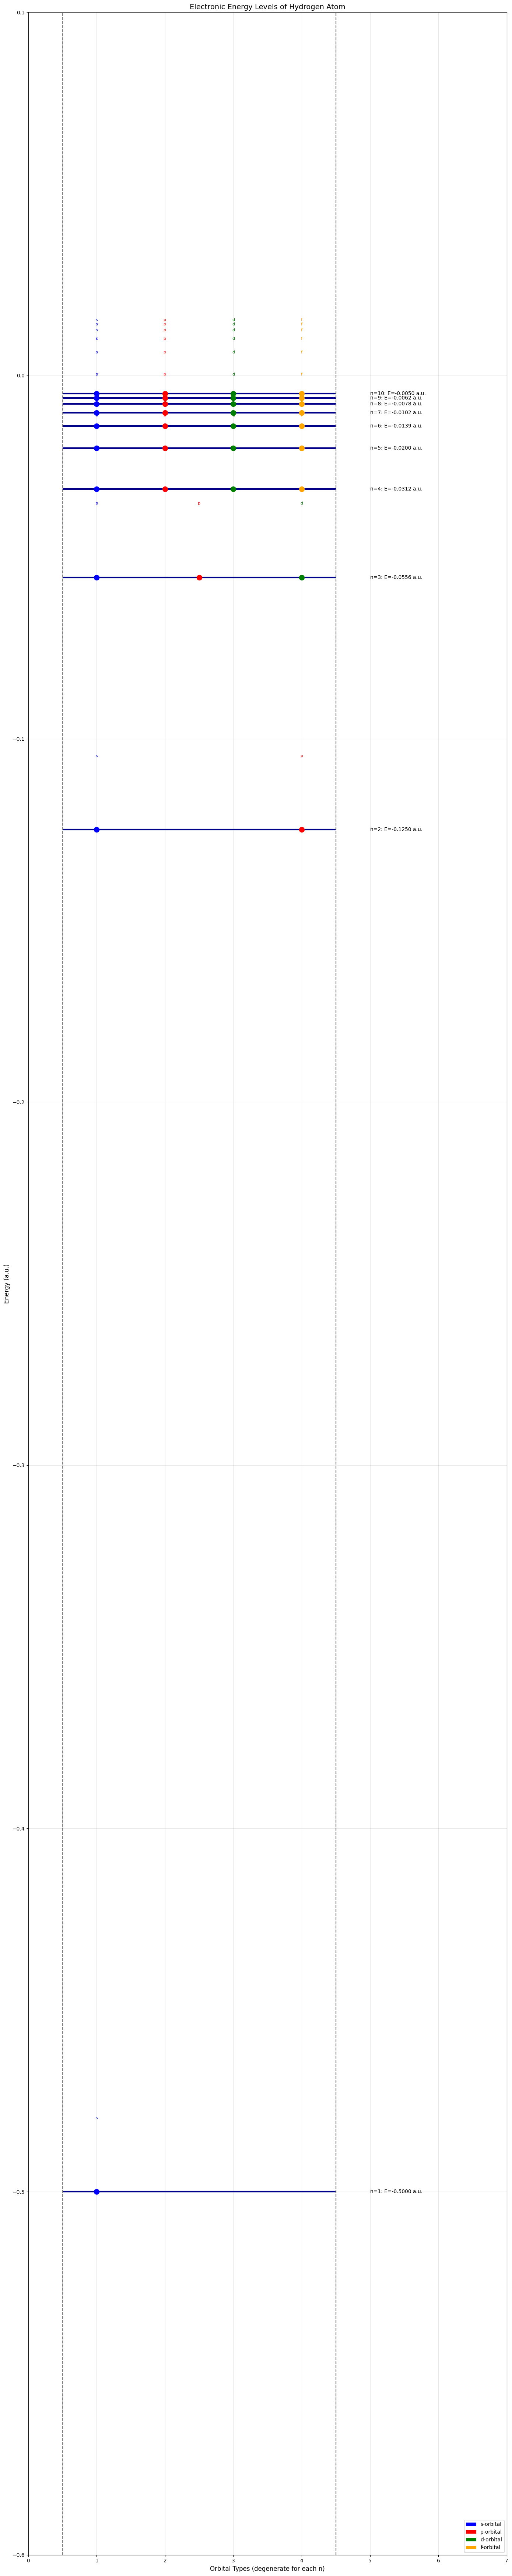

Energy levels of Hydrogen atom (in atomic units):
n=1: E = -0.500000 a.u. = -13.6057 eV
  Degeneracy: 1 (includes 1 orbital types)
  Orbitals: 1s

n=2: E = -0.125000 a.u. = -3.4014 eV
  Degeneracy: 4 (includes 2 orbital types)
  Orbitals: 2s, 2p

n=3: E = -0.055556 a.u. = -1.5117 eV
  Degeneracy: 9 (includes 3 orbital types)
  Orbitals: 3s, 3p, 3d

n=4: E = -0.031250 a.u. = -0.8504 eV
  Degeneracy: 16 (includes 4 orbital types)
  Orbitals: 4s, 4p, 4d, 4f

n=5: E = -0.020000 a.u. = -0.5442 eV
  Degeneracy: 25 (includes 5 orbital types)
  Orbitals: 5s, 5p, 5d, 5f, 5higher

n=6: E = -0.013889 a.u. = -0.3779 eV
  Degeneracy: 36 (includes 6 orbital types)
  Orbitals: 6s, 6p, 6d, 6f, 6higher, 6higher

n=7: E = -0.010204 a.u. = -0.2777 eV
  Degeneracy: 49 (includes 7 orbital types)
  Orbitals: 7s, 7p, 7d, 7f, 7higher, 7higher, 7higher

n=8: E = -0.007812 a.u. = -0.2126 eV
  Degeneracy: 64 (includes 8 orbital types)
  Orbitals: 8s, 8p, 8d, 8f, 8higher, 8higher, 8higher, 8higher

n=9: E = -0.00

In [25]:
# Theoretical Electronic Energy Levels of Hydrogen (H)
#!pip install periodictable qutip -q

import numpy as np
import matplotlib.pyplot as plt
import periodictable as pt
from typing import Dict, Optional

# Constants for Hydrogen (H)
Z = 1  # Nuclear charge for hydrogen
n_max = 10  # Maximum principal quantum number

# Define the Hamiltonian for hydrogen atom
def hydrogen_hamiltonian(Z, n_max):
    """
    Calculate energy levels for hydrogen atom using the Bohr model
    E_n = -Z^2 / (2 * n^2) in atomic units
    """
    energies = []
    n_values = []
    for n in range(1, n_max + 1):
        energy_n = -Z**2 / (2 * n**2)
        energies.append(energy_n)
        n_values.append(n)
    return np.array(n_values), np.array(energies)

# Calculate the energy levels
n_values, energy_levels = hydrogen_hamiltonian(Z, n_max)

# Plot the energy levels
plt.figure(figsize=(14, 70))

# For hydrogen, all orbitals with the same n have the same energy (no l-dependence)
# We'll show the degeneracy by plotting multiple lines for each n
colors = ['blue', 'red', 'green', 'orange']
orbital_types = ['s', 'p', 'd', 'f']

for i, (n, energy) in enumerate(zip(n_values, energy_levels)):
    # Plot the energy level
    plt.hlines(energy, xmin=0.5, xmax=4.5, color='darkblue', lw=3)

    # Show the degenerate orbitals available at each n
    x_positions = np.linspace(1, 4, min(n, 4))
    for j in range(min(n, 4)):
        if j < n:  # orbital exists for this n
            plt.scatter(x_positions[j], energy, color=colors[j], s=100, zorder=5)
            plt.text(x_positions[j], energy + 0.02, orbital_types[j],
                    ha='center', fontsize=8, color=colors[j])

    # Label the energy level
    plt.text(5, energy, f'n={n}: E={energy:.4f} a.u.',
            va='center', fontsize=10)

# Add vertical lines to separate n levels visually
for n in range(1, n_max + 1):
    plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=4.5, color='gray', linestyle='--', alpha=0.3)

plt.xlim(0, 7)
plt.ylim(min(energy_levels) - 0.1, 0.1)
plt.xlabel('Orbital Types (degenerate for each n)', fontsize=12)
plt.ylabel('Energy (a.u.)', fontsize=12)
plt.title('Electronic Energy Levels of Hydrogen Atom', fontsize=14)
plt.grid(True, alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'{orbital_types[i]}-orbital')
                  for i in range(4)]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Print energy levels
print("Energy levels of Hydrogen atom (in atomic units):")
print("=" * 50)
for n, energy in zip(n_values, energy_levels):
    print(f"n={n}: E = {energy:.6f} a.u. = {energy * 27.2114:.4f} eV")
    # Show degeneracy
    degeneracy = n**2
    print(f"  Degeneracy: {degeneracy} (includes {n} orbital types)")
    orbitals = []
    for l in range(n):
        orbitals.append(f"{n}{orbital_types[l] if l < 4 else 'higher'}")
    print(f"  Orbitals: {', '.join(orbitals)}")
    print()

# Calculate and display some important transitions
print("\nImportant Transitions:")
print("=" * 50)
# Lyman series (n -> 1)
print("Lyman series (UV, n → 1):")
for n_upper in range(2, 5):
    wavelength = 1 / (Z**2 * (1/1**2 - 1/n_upper**2)) * 91.127  # nm
    print(f"  n={n_upper} → n=1: λ = {wavelength:.2f} nm")

# Balmer series (n -> 2)
print("\nBalmer series (Visible, n → 2):")
for n_upper in range(3, 7):
    wavelength = 1 / (Z**2 * (1/2**2 - 1/n_upper**2)) * 91.127  # nm
    print(f"  n={n_upper} → n=2: λ = {wavelength:.2f} nm")

Hydrogen is much simpler than an element like calcium since it only has one electron and no quantum defects:The key differences between hydrogen and calcium:

1. **No Quantum Defects**: Hydrogen is a one-electron atom, so there are no electron-electron interactions or screening effects. The energy depends only on the principal quantum number n.

2. **Degeneracy**: For hydrogen, all orbitals with the same n have the same energy (s, p, d, f are degenerate). This is different from multi-electron atoms like calcium.

3. **Exact Solution**: The hydrogen atom has an exact analytical solution: E_n = -Z²/(2n²) in atomic units, where Z=1 for hydrogen.

4. **Energy Scale**: The energies are more negative (more tightly bound) compared to calcium's outer electrons because there's no shielding.

The code also calculates some important spectral series:
- **Lyman series**: Transitions to n=1 (UV region)
- **Balmer series**: Transitions to n=2 (visible region)

> <font color="blue">**These are the emission lines you'd see when hydrogen atoms transition between energy levels, which is how we originally discovered quantum mechanics!**

#### **Hydrogen molecule (H₂)**

In [ ]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    H  0.00 0.00  0.00
    H  0.00 0.00  0.74
'''

# Name
molecule = 'Hydrogen (H₂)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # H₂ gas is stable, closed-shell diatomic molecule. The two electrons (one from each H atom) form a covalent bond with paired spins.
# wo electrons, paired in a bonding orbital. Ground state is a singlet. mol.spin = 0 (since S=0, 2S=0)
mol.build()

In [ ]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Hydrogen (H₂) molecule symmetry:
 Top group: Dooh
 Group name: Dooh
--------------------


Point Group Symmetry
* **Shape:** Linear
* **Symmetry Operations:** Infinite rotation axis ($C_\infty$) along the bond, infinite number of vertical mirror planes ($\sigma_v$), a horizontal mirror plane ($\sigma_h$), and an inversion center ($i$).
* **Point Group:** **$D_{\infty h}$ (Dooh)**
* *Yes, this one is $D_{\infty h}$!*

In [ ]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -1.12870009355644


np.float64(-1.1287000935564422)

converged SCF energy = -1.12870009355644


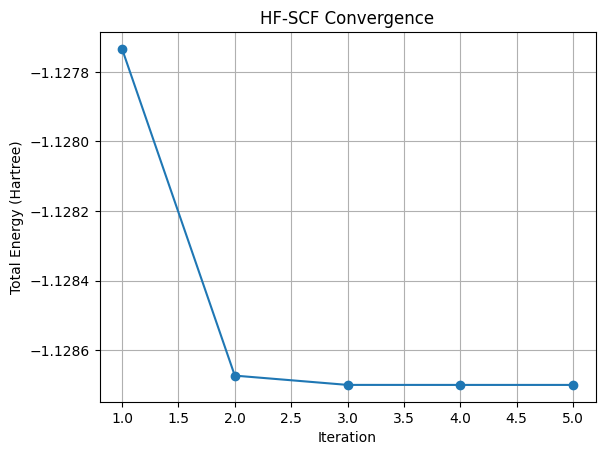

Ground state energy for Hydrogen (H₂): -1.128700093556442 Hartree


In [ ]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [ ]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -1.17328112090857


np.float64(-1.1732811209085723)

In [ ]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -1.12870009355644
E(MP2) = -1.15507165119134  E_corr = -0.0263715576348956
E(SCS-MP2) = -1.16034596271832  E_corr = -0.0316458691618748
MP2 energy: -0.026371557634895633 Hartree


In [ ]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -1.12870009355644
E(CCSD) = -1.163374496404818  E_corr = -0.03467440284837575
CCSD(T) correction = 9.43065518502396e-20


In [ ]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -1.12870009355644
Excited State energies (eV)
[14.07567057 21.45479287 32.30709355]

** Singlet excitation energies and oscillator strengths **
Excited State   1:  A1u     14.07567 eV     88.08 nm  f=0.6152
Excited State   2:  A1g     21.45479 eV     57.79 nm  f=0.0000
Excited State   3:  A1u     32.30709 eV     38.38 nm  f=0.2024


In [ ]:
# Geometry Optimization (in Angstroms) with HF or DFT
# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-d15fb86e-bb58-415b-802b-2cd1d0a1e7ae.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.000000   0.740000    0.000000  0.000000  0.000000

WARN: Unable to to identify input symmetry using original axes.
Different symmetry axes will be used.

converged SCF energy = -1.12870009355644
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000     0.0061741408
1 H     0.0000000000     0.0000000000    -0.0061741408
----------------------------------------------
cycle 1: E = -1.12870009356  dE = -1.1287  norm(grad) = 0.00873155


Step    0 : Gradient = 6.174e-03/6.174e-03 (rms/max) Energy = -1.1287000936
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.91394e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000  -0.004174    0.000000  0.000000  0.365826
   H   0.000000   0.000000   0.744174    0.000000  0.000000  0.374174
converged SCF energy = -1.12874600541964
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000    -0.0002973927
1 H     0.0000000000     0.0000000000     0.0002973927
----------------------------------------------
cycle 2: E = -1.12874600542  dE = -4.59119e-05  norm(grad) = 0.000420577


Step    1 : Displace = 4.174e-03/4.174e-03 (rms/max) Trust = 1.000e-01 (=) Grad = 2.974e-04/2.974e-04 (rms/max) E (change) = -1.1287460054 (-4.591e-05) Quality = 0.943
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 4.10247e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000  -0.003982    0.000000  0.000000  0.370192
   H   0.000000   0.000000   0.743982    0.000000  0.000000  0.369808
converged SCF energy = -1.1287461158924
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000    -0.0000072628
1 H     0.0000000000     0.0000000000     0.0000072628
----------------------------------------------
cycle 3: E = -1.12874611589  dE = -1.10473e-07  norm(grad) = 1.02712e-05


Step    2 : Displace = 1.918e-04/1.918e-04 (rms/max) Trust = 1.414e-01 (+) Grad = 7.263e-06/7.263e-06 (rms/max) E (change) = -1.1287461159 (-1.105e-07) Quality = 1.025
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 4.10247e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 0.195 seconds


[[ 0.          0.         -0.70672358]
 [ 0.          0.          0.70672358]]


converged SCF energy = -1.12870009355644


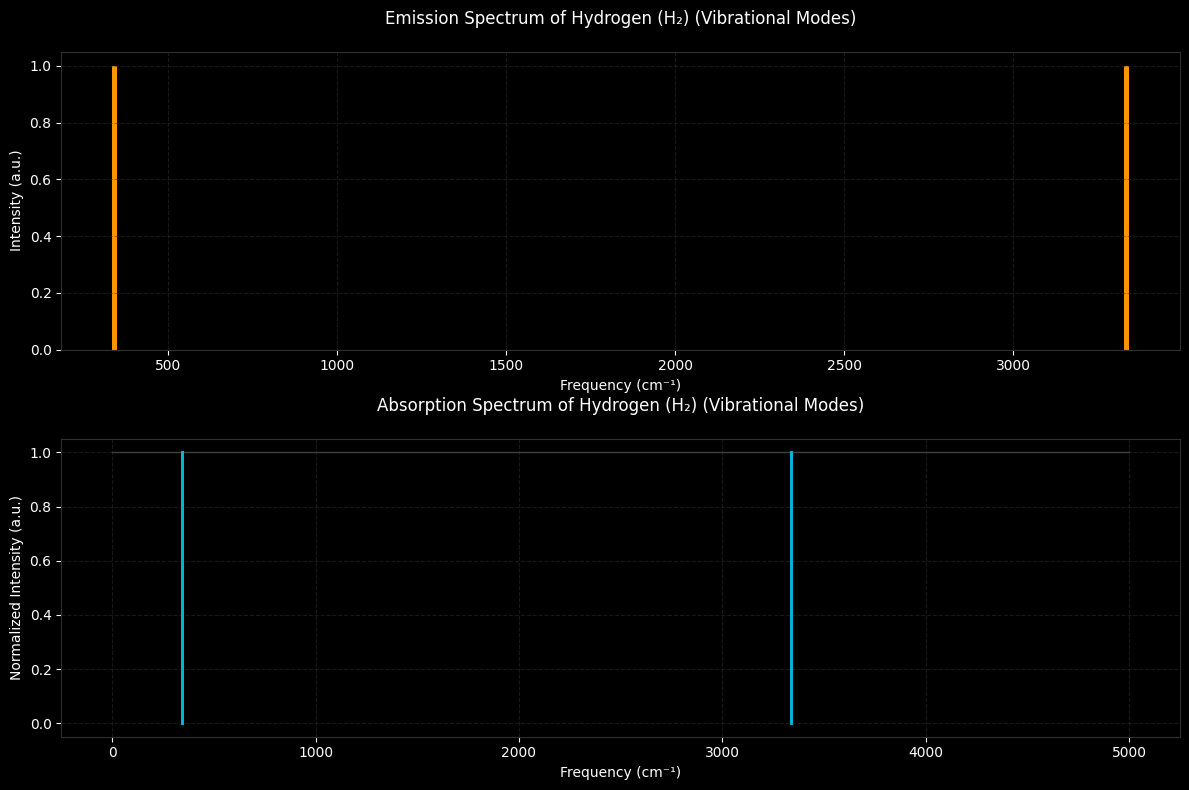

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()